# REGION OF INTEREST (ROI) - Tracé de l'intensité du l'image corrigée en fonction de la biommasse

 ### Bibliothèques

In [53]:
import numpy as np
import matplotlib.pyplot as plt

### Chargement de ROI - COORDONNEES

In [54]:
def loadParcels(num = None):
    if num == None: # On charge toutes les parcelles dans une liste
        parcels = []
        for i in range(1,17):
            #parcels.append(np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(i)+ ".dat"))
            parcels.append(np.loadtxt("indcsROI_PAR" +"{:02d}".format(i)+ ".dat"))
        return [x.astype(int) for x in parcels]
    else: #  On charge uniquemnent la parcelle numéro "num"
        #parcel = np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(num)+ ".dat")
        parcel = np.loadtxt("indcsROI_PAR" +"{:02d}".format(num)+ ".dat")
        return parcel.astype(int)

### Chargement des ROI - BIOMASSE

In [55]:
def loadBiomass(num = None):
    if num == None : 
        bmssList = np.loadtxt("16insituAGB.dat")
    else:
        l = np.loadtxt("16insituAGB.dat")
        bmssList = l[num - 1]
    return bmssList

### Affichage des ROI

In [56]:
def plotParcels(num = None):
    band2 = np.loadtxt("band2.txt")
    #band2x = 10 * np.log(band2)
    plt.figure(1)
    plt.imshow(band2)
    if num == None :
        Parcels = loadParcels()
        for i in range(16):
            X = Parcels[i]
            plt.scatter(X[:,0], X[:,1])
            plt.savefig("parcel.png")
    else:
        X = loadParcels(num)
        print(np.shape(X))
        plt.scatter(X[:,0], X[:,1])
        plt.savefig("parcel.png")

(1598, 2)



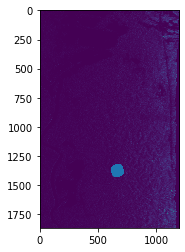

In [57]:
#plotParcels()
test = plotParcels(1)
print()

### Moyenne des déplacements 

In [58]:
def mean(tabx,taby):
    Sx,Sy = 0,0
    for i in tabx:
        Sx += i
    for j in taby:
        Sy += j
    mx = Sx/len(tabx)
    my = Sy/len(taby)
    return mx,my

In [59]:
def shiftImage(mx,my):
    pass

### Valeurs des intensités : image BAND 2 corrigée

In [60]:
def Intensities(band1shiftee,band2):
    band2corr = band2 / band1shiftee
    return band2corr

In [61]:
band1 = np.loadtxt("band1.txt")
band2 = np.loadtxt("band2.txt")

<ipython-input-67-5bc743f73d4b>:1: RuntimeWarning: divide by zero encountered in log
  img = Intensities(band1,10*np.log(band2))


-28.3693481542767


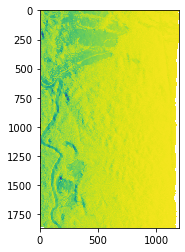

In [67]:
img = Intensities(band1,10*np.log(band2))
plt.imshow(img)
print(img[500,500])

### Intensité d'une zone particulière

In [68]:
def IntensityZone(X,img): # programme faux
    IntTab = []
    n,m  = np.shape(img)
    for i in range(n):
        if (i in X[:,1]):
            for j in range(m):
                if  (j in X[:,0]):
                    IntTab.append(img[i,j])
    Intmean = np.mean(np.array(IntTab))
    return Intmean, IntTab

def IntensityZone_xp(X,img): # programme juste
    IntTab = []
    n,m = np.shape(X)
    for i in range(n):
        IntTab.append(img[X[i][1],X[i][0]])
    Intmean = np.mean(np.array(IntTab))
    return Intmean, IntTab

In [69]:
X = loadParcels(1)
print(np.shape(X))
print("1598 couples de coordonnées dans X")
print(X[:,0]); print(len(X[:,0]))
print(X[:,1]); print(len(X[:,1]))
print(np.shape(img))
m,tab = IntensityZone_xp(X,img)
print("-----------------------------------------------")
print(len(tab))
print("-----------------------------------------------")
print(m)
print("-----------------------------------------------")

(1598, 2)
1598 couples de coordonnées dans X
[662 660 661 ... 665 666 663]
1598
[1370 1371 1371 ... 1368 1368 1369]
1598
(1866, 1193)
-----------------------------------------------
1598
-----------------------------------------------
-21.095424058608888
-----------------------------------------------


### Programme Principal

In [70]:
def main(img): #img est l'image corrigée - rapport band2/band1-corrigee
    IntensityData = []
    BiomassData = loadBiomass()
    
    Parcels = loadParcels()
    for X in Parcels:
        IntensityZone_X = IntensityZone_xp(X,img)
        IntensityData.append(IntensityZone_X[0])
        
    print(BiomassData)
    print("---------------------------------------------")
    print(IntensityData)
    
    plt.plot(np.array(IntensityData),np.array(BiomassData))
    plt.savefig("plotMaternelle.png")

[369.6 346.4 309.  284.7 300.5 431.9 392.4 257.5 337.5 307.5 402.7 304.3
 405.3 407.7 417.8 406.1]
---------------------------------------------
[-21.095424058608888, -23.919666357413703, -16.210420669661175, -12.854392114989379, -7.137493125983361, -7.101848304897907, -11.39844719671318, -9.725593839206699, -8.875526400328722, -4.154483427492075, -6.5070152558637, -5.055879422333915, -17.344140056894904, -14.376496576431435, -8.47098967304228, -14.424423760725956]


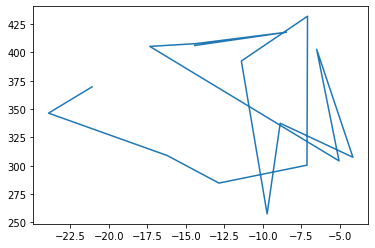

In [71]:
main(img)